In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import mctorch.nn as mnn
import mctorch.optim as moptim

import warnings
warnings.filterwarnings('ignore')

import sys

In [2]:
sys.path.append("../../Continuous_Symmetry_Discovery")

In [3]:
import OurMethod

In [4]:
X_rocket = pd.read_csv("MRM_Transformed_Daily.csv", header=None)

In [5]:
X_rocket.shape

(13149, 1344)

In [6]:
X_phate = pd.read_csv("PHATE_Transformed_Daily.csv", header=None)
Xp = X_phate.to_numpy()
Xpt = Xp.transpose()

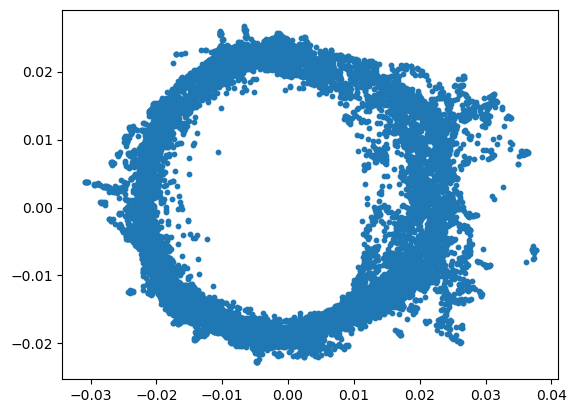

In [7]:
# General shape of phate embedding.
plt.scatter(Xpt[0], Xpt[1], s=10.0)

In [8]:
dfDaily = pd.read_csv("Daily.csv")

In [9]:
dfDaily.head()

,date,Elevation,ppt_1,ppt_2,ppt_3,ppt_4,ppt_5,ppt_6,ppt_7,ppt_8,...,swe_11,swe_12,swe_13,swe_14,swe_15,swe_16,swe_17,swe_18,swe_19,swe_20
0,1981-10-01,5915.90,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000
1,1981-10-02,5915.90,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000
2,1981-10-03,5915.89,1.713867,2.747555,1.328050,3.702035,1.0892,1.552648,0.974444,3.618103,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000
3,1981-10-04,5915.87,4.569200,15.778116,12.808029,8.325070,16.1904,19.782738,23.672754,20.649353,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.042553
4,1981-10-05,5915.85,2.892400,2.783347,3.057028,2.423404,4.8203,5.012449,5.178000,5.398532,...,0.043269,0.373494,1.333333,0.0,0.196078,0.17561,0.0,0.118519,0.0,0.191489


In [10]:
tmins = dfDaily.columns[dfDaily.columns.str.contains('tmin')]
tmaxs = dfDaily.columns[dfDaily.columns.str.contains('tmax')]
swes = dfDaily.columns[dfDaily.columns.str.contains('swe')]
precips = dfDaily.columns[dfDaily.columns.str.contains('ppt')]

dfDaily['Tmin'] = dfDaily[list(tmins)].mean(axis=1)
dfDaily['Tmax'] = dfDaily[list(tmaxs)].mean(axis=1)
dfDaily['SWE'] = dfDaily[list(swes)].mean(axis=1)
dfDaily['Precip'] = dfDaily[list(precips)].mean(axis=1)

In [11]:
allmoday = [dfDaily[2*365:3*365+1]["date"].iloc[i][5:] for i in range(366)]

In [12]:
daysdf = dfDaily[dfDaily["date"].str.endswith("10-01")].index

In [13]:
dfDaily["MTmax"] = np.zeros(dfDaily.shape[0])
dfDaily["STmax"] = np.zeros(dfDaily.shape[0])

dfDaily["MTmin"] = np.zeros(dfDaily.shape[0])
dfDaily["STmin"] = np.zeros(dfDaily.shape[0])

dfDaily["MPrecip"] = np.zeros(dfDaily.shape[0])
dfDaily["SPrecip"] = np.zeros(dfDaily.shape[0])

dfDaily["MSWE"] = np.zeros(dfDaily.shape[0])
dfDaily["SSWE"] = np.zeros(dfDaily.shape[0])

In [14]:
dfDaily["MTmin"].iloc[4000]

0.0

In [15]:
for day in allmoday:
    daysdf = dfDaily[dfDaily["date"].str.endswith(day)]
    #daysinds = list(daysdf.index)
    #Values = [daysdf["Tmax"].mean(), daysdf["Tmax"].std(),
    #          daysdf["Tmin"].mean(), daysdf["Tmin"].std(),
    #          daysdf["Precip"].mean(), daysdf["Precip"].std(),
    #          daysdf["SWE"].mean(), daysdf["SWE"].std()]

    #for index in daysinds:
    #    dfDaily["MTmax"].iloc[index] = Values[0]
    #    dfDaily["STmax"].iloc[index] = Values[1]
    #    dfDaily["MTmin"].iloc[index] = Values[2]
    #    dfDaily["STmin"].iloc[index] = Values[3]
    #    dfDaily["MPrecip"].iloc[index] = Values[4]
    #    dfDaily["SPrecip"].iloc[index] = Values[5]
    #    dfDaily["MSWE"].iloc[index] = Values[6]
    #    dfDaily["SSWE"].iloc[index] = Values[7]
    
    dfDaily["MTmax"].iloc[daysdf.index] = daysdf["Tmax"].mean()
    dfDaily["STmax"].iloc[daysdf.index] = daysdf["Tmax"].std()

    dfDaily["MTmin"].iloc[daysdf.index] = daysdf["Tmin"].mean()
    dfDaily["STmin"].iloc[daysdf.index] = daysdf["Tmin"].std()

    dfDaily["MPrecip"].iloc[daysdf.index] = daysdf["Precip"].mean()
    dfDaily["SPrecip"].iloc[daysdf.index] = daysdf["Precip"].std()

    dfDaily["MSWE"].iloc[daysdf.index] = daysdf["SWE"].mean()
    dfDaily["SSWE"].iloc[daysdf.index] = daysdf["SWE"].std()

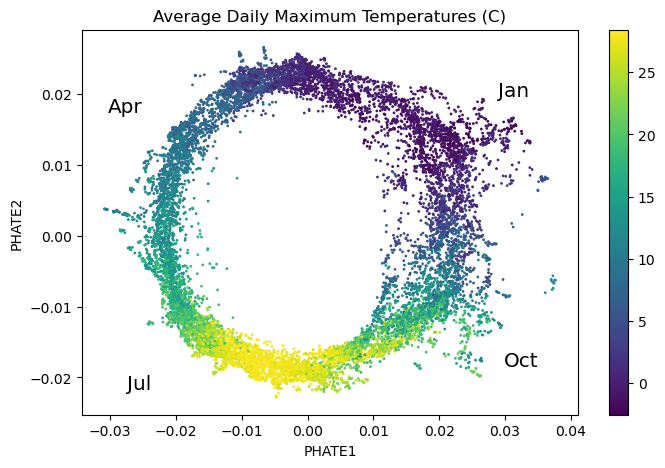

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(Xpt[0], Xpt[1], c=dfDaily["MTmax"].iloc[1461:], s=1.0)
plt.title("Average Daily Maximum Temperatures (C)")
plt.text(0.035*np.cos(5.73), 0.035*np.sin(5.73), "Oct", fontsize="x-large")
plt.text(0.035*np.cos(0.599), 0.035*np.sin(0.599), "Jan", fontsize="x-large")
plt.text(0.035*np.cos(2.62), 0.035*np.sin(2.62), "Apr", fontsize="x-large")
plt.text(0.035*np.cos(3.81), 0.035*np.sin(3.81), "Jul", fontsize="x-large")
plt.colorbar()
plt.xlabel("PHATE1")
plt.ylabel("PHATE2")
plt.savefig("NewTemperatures.pdf")
#plt.savefig("temperatures.png")
plt.show()

## We now apply Level Set Estimation

In [17]:
Xsq = Xp**2

In [18]:
Xsq = np.hstack((np.ones(Xsq.shape[0]).reshape((Xsq.shape[0],1)), Xsq ))

In [19]:
Xsq

array([[1.00000000e+00, 4.07566762e-04, 1.25919213e-04],
       [1.00000000e+00, 3.31799262e-04, 9.74949658e-05],
       [1.00000000e+00, 5.69833370e-04, 1.19739398e-04],
       ...,
       [1.00000000e+00, 1.29651970e-04, 1.85935104e-04],
       [1.00000000e+00, 1.39988201e-04, 1.70363695e-04],
       [1.00000000e+00, 1.42115043e-04, 1.62831455e-04]])

In [20]:
t1 = OurMethod.tryDim(Xsq,1)

In [21]:
t1

(2.30882992724446e-08,
 Parameter containing:
 Parameter(Parameter([[-2.3901e-04],
            [ 5.6915e-02],
            [ 9.9838e-01]], requires_grad=True)))

In [32]:
myf = OurMethod.invF(t1[1].detach(),['1','x^2','y^2'],['x','y'],Xp)

In [33]:
J = myf.Jacf(Xp)

In [34]:
extB = OurMethod.getExtendedFeatureMatrix2(Xp, J, 2)

In [35]:
extB.shape

torch.Size([13149, 4])

In [36]:
T1 = OurMethod.tryDimV(extB, 1)

In [37]:
T1

(8.193980249870947e-08,
 Parameter containing:
 Parameter(Parameter([[-0.0407],
            [ 0.7293],
            [-0.6767],
            [ 0.0920]], requires_grad=True)))

In [38]:

previousvals = torch.tensor([[ 2.9743e-4], [0.33596], [0.94189]])

In [39]:
previousvals

tensor([[2.9743e-04],
        [3.3596e-01],
        [9.4189e-01]])

In [40]:
myF = OurMethod.invF(previousvals,['1','x^2','y^2'],['x','y'],Xp)

In [41]:
Jpre = myF.Jacf(Xp)

In [42]:
extBpre = OurMethod.getExtendedFeatureMatrix2(Xp, Jpre, 2)

In [43]:
T1p = OurMethod.tryDimV(extBpre, 1, criterion=torch.nn.L1Loss(), optimizer=moptim.rAdagrad)

In [44]:
T1p

(5.47685878871107e-08,
 Parameter containing:
 Parameter(Parameter([[ 9.1791e-05],
            [-9.4190e-01],
            [ 3.3590e-01],
            [ 5.2064e-05]], requires_grad=True)))

In [45]:
1+1

2

In [46]:
def invfunc(p):
    term = 0.33596*p[0]**2 + 0.94189*p[1]**2 - 2.9743e-4
    return term

In [47]:
csym = [invfunc(p) for p in Xp]

In [48]:
len(csym)

13149

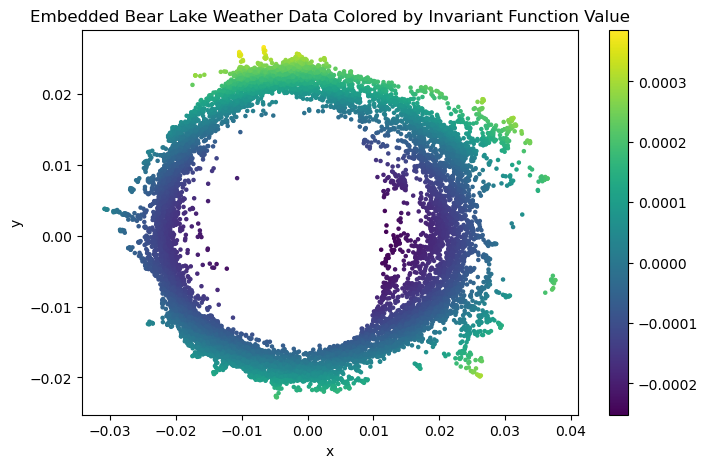

In [49]:
plt.figure(figsize=(8,5))
plt.scatter(Xpt[0], Xpt[1], c=csym, s=5.0)
plt.title("Embedded Bear Lake Weather Data Colored by Invariant Function Value")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("invf.pdf")
plt.show()

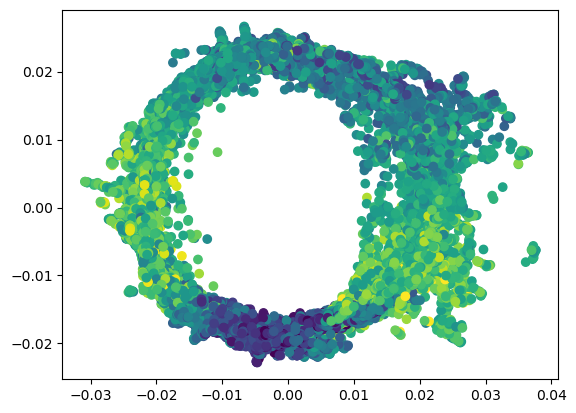

In [167]:
plt.scatter(Xpt[0], Xpt[1], c=dfDaily["STmax"].iloc[1461:])

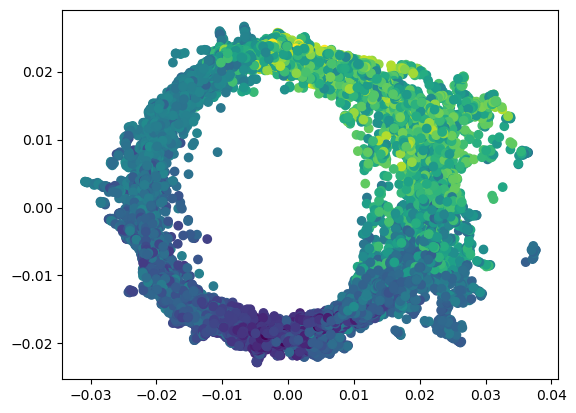

In [168]:
plt.scatter(Xpt[0], Xpt[1], c=dfDaily["STmin"].iloc[1461:])

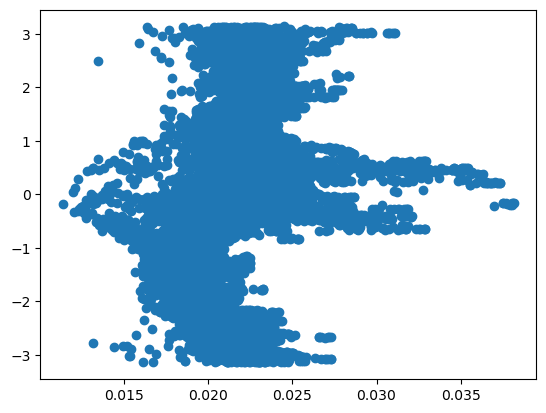

In [216]:
plt.scatter(ppt[0],ppt[1])

In [219]:
rmed = np.median(ppt[0])

In [305]:
diffR = np.array([np.abs(rmed-p) for p in ppt[0]])

In [220]:
circle_dat = np.array([[rmed,p] for p in ppt[1]])

In [412]:
knnDens = KNeighborsRegressor(n_neighbors=19)

In [413]:
knnDens.fit(np.array(ppt[1]).reshape(-1,1),diffR)

KNeighborsRegressor(n_neighbors=19)

In [414]:
def getMyDens(knn, X, y):
    dists, neighbors = knn.kneighbors(X)
    dens = [np.std(y[point_neighbor]) for point_neighbor in neighbors]
    return dens

In [415]:
dens = getMyDens(knnDens, np.array(ppt[1]).reshape(-1,1), ppt[0])

In [366]:
dens = knnDens.predict(np.array(ppt[1]).reshape(-1,1))

In [386]:
np.array(ppt[1])[0].reshape(-1,1)

array([[-0.50731273]])

In [385]:
knnDens.kneighbors(np.array(ppt[1])[0].reshape(-1,1))

(array([[0.00000000e+00, 4.68789169e-05, 2.90019819e-04]]),
 array([[   0, 2553, 9854]]))

In [223]:
from scipy import stats

In [311]:
KDE = stats.gaussian_kde(circle_dat.transpose(), weights=diffR)

In [312]:
dens = KDE(circle_dat.transpose())

In [313]:
len(dens)

13149

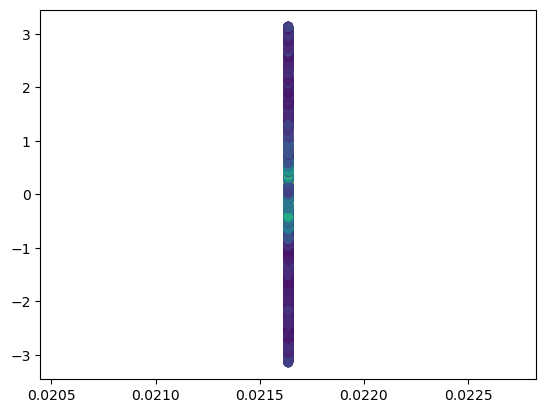

In [416]:
plt.scatter(circle_dat.transpose()[0],circle_dat.transpose()[1], c=dens)

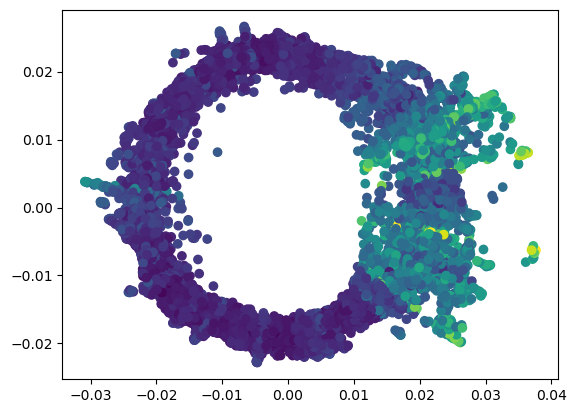

In [417]:
plt.scatter(Xpt[0], Xpt[1], c=dens)

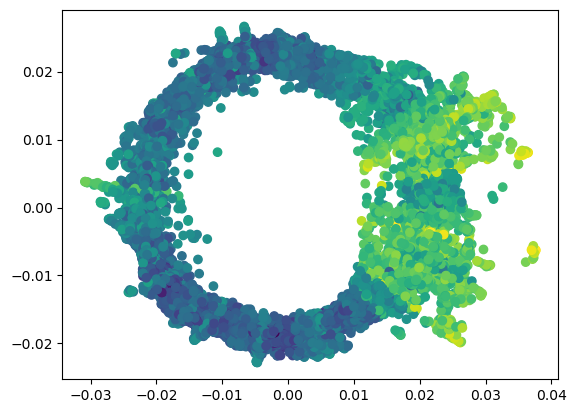

In [418]:
plt.scatter(Xpt[0], Xpt[1], c=np.log(dens))

(array([4393., 4462., 1418., 1171.,  842.,  507.,  177.,  119.,   35.,
          25.]),
 array([0.00048939, 0.00126665, 0.00204392, 0.00282118, 0.00359844,
        0.0043757 , 0.00515297, 0.00593023, 0.00670749, 0.00748475,
        0.00826202]),
 <BarContainer object of 10 artists>)

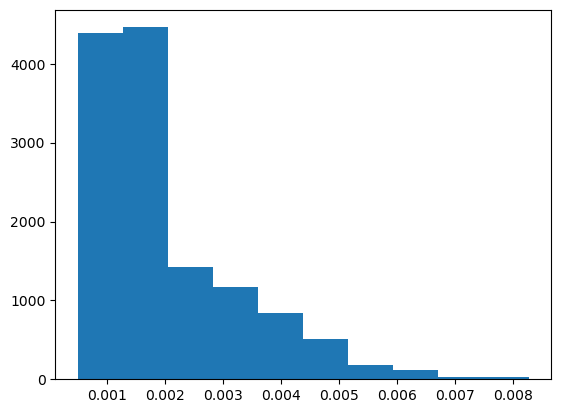

In [419]:
plt.hist(dens)

(array([  43.,  380., 2516., 3726., 2097., 1287., 1321., 1156.,  511.,
         112.]),
 array([-7.62234833, -7.33972216, -7.05709598, -6.77446981, -6.49184363,
        -6.20921746, -5.92659128, -5.64396511, -5.36133893, -5.07871276,
        -4.79608658]),
 <BarContainer object of 10 artists>)

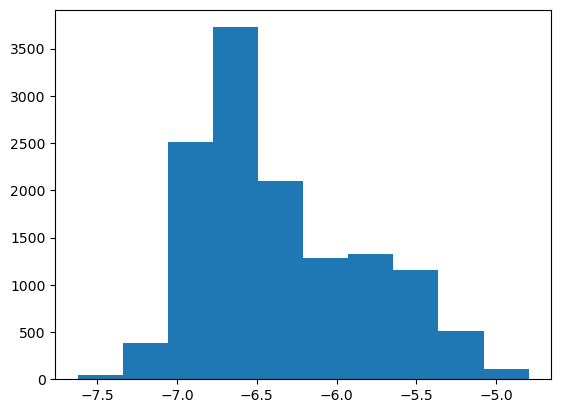

In [420]:
plt.hist(np.log(dens))

In [421]:
np.min(dens)

0.0004893912271775028

In [422]:
np.max(dens)

0.008262016578548003

In [423]:
#cors = [np.corrcoef(ppt[0], y=X_rocket[i])[0][1] for i in range(X_rocket.shape[1])]

In [424]:
#cors_sector = [np.corrcoef(rSector, y=X_rocket_sector[i])[0][1] for i in range(X_rocket_sector.shape[1])]

In [425]:
#X_rocket_sector = X_rocket.iloc[sectorInds]
newX = dfDaily[["STmax","STmin"]][1461:].to_numpy() #.iloc[sectorInds].to_numpy()

In [436]:
#X_phate_sector = X_phate.iloc[sectorInds]
densSector = np.log(dens) #[sectorInds]

In [437]:
#newX = X_phate_sector.to_numpy()

In [438]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(newX, densSector, test_size=0.25, random_state=0)

In [439]:
knnNew = KNeighborsRegressor(n_neighbors=11)
knnNew.fit(X_trainN,y_trainN)
thepreds = knnNew.predict(newX)
print(knnNew.score(X_trainN,y_trainN))
print(knnNew.score(X_testN,y_testN))

0.6084143607635948
0.5605391006897715


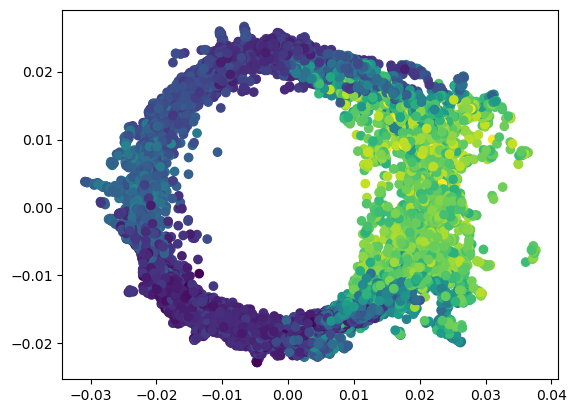

In [440]:
plt.scatter(Xpt[0], Xpt[1], c=thepreds)

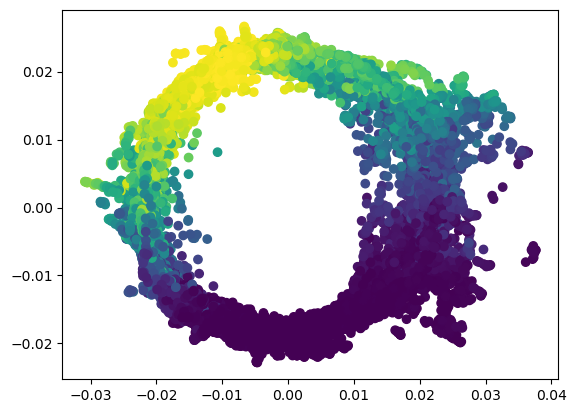

In [169]:
plt.scatter(Xpt[0], Xpt[1], c=dfDaily["MSWE"].iloc[1461:])

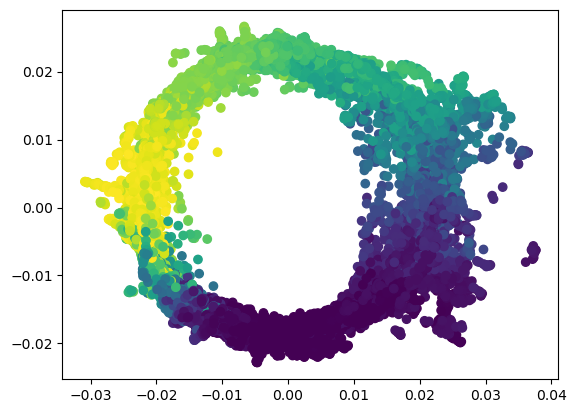

In [170]:
plt.scatter(Xpt[0], Xpt[1], c=dfDaily["SSWE"].iloc[1461:])

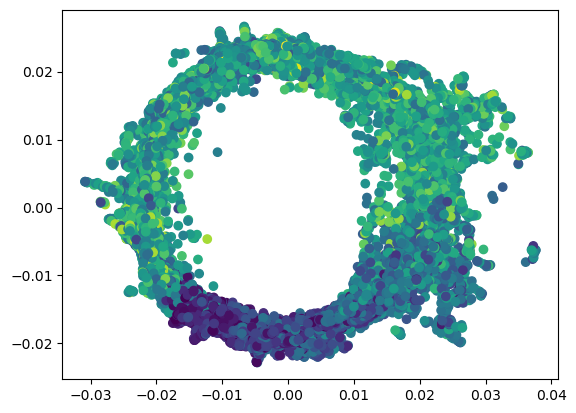

In [171]:
plt.scatter(Xpt[0], Xpt[1], c=dfDaily["MPrecip"].iloc[1461:])

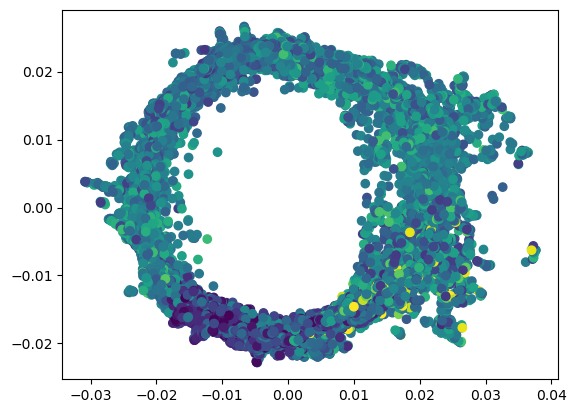

In [172]:
plt.scatter(Xpt[0], Xpt[1], c=dfDaily["SPrecip"].iloc[1461:])

In [ ]:
#sectorInds = [i for i in range(phate_polar.shape[0]) if (phate_polar[i][1] < np.pi/4 and -np.pi/4 < phate_polar[i][1])]
#rSector = [ppt[0][i] for i in sectorInds]
#X_rocket_sector = X_rocket.iloc[sectorInds]
#cors_sector = [np.corrcoef(rSector, y=X_rocket_sector[i])[0][1] for i in range(X_rocket_sector.shape[1])]

## Previous stuff

In [98]:
dfP4["Date"]

0     1975-05-14
1     1975-08-06
2     1975-09-19
3     1976-07-29
4     1976-08-09
         ...    
307   2007-04-25
308   2007-05-30
309   2007-06-18
310   2007-08-08
311   2007-11-08
Name: Date, Length: 312, dtype: datetime64[ns]

In [102]:
np.argmin(np.abs(days[0]-dfP4["Date"]))

113

In [106]:
dfP4.iloc[113]["avgP"]

17.714285714285715

In [107]:
nearestP = [dfP4.iloc[np.argmin(np.abs(days[i]-dfP4["Date"]))]["avgP"] for i in range(len(days))]

In [108]:
nearestP

[17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 17.714285714285715,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,


In [110]:
len(nearestP)

13149

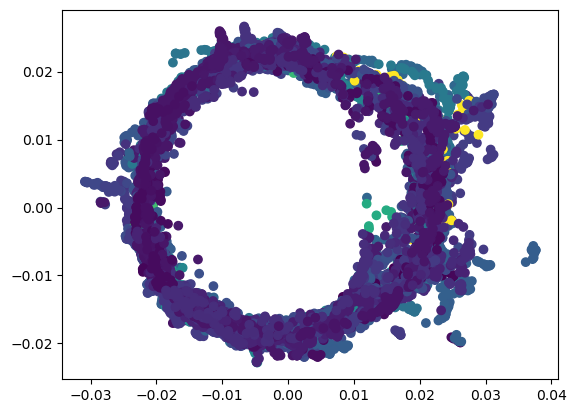

In [118]:
# General shape of phate embedding.
plt.scatter(Xpt[0][0:5*1461], Xpt[1][0:5*1461], c=nearestP[0:5*1461])

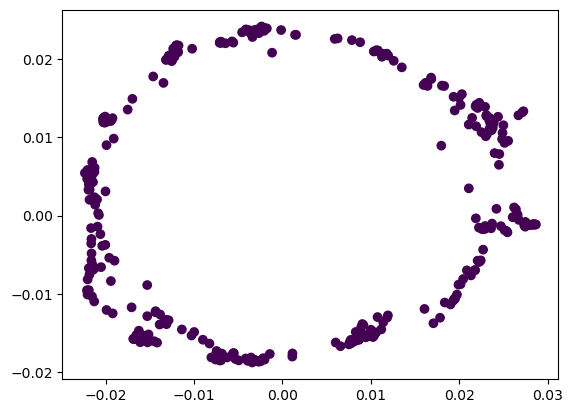

In [112]:
# Here is the last year with color being the day of the year.
plt.scatter(Xpt[0][-365:], Xpt[1][-365:], c=nearestP[-365:])

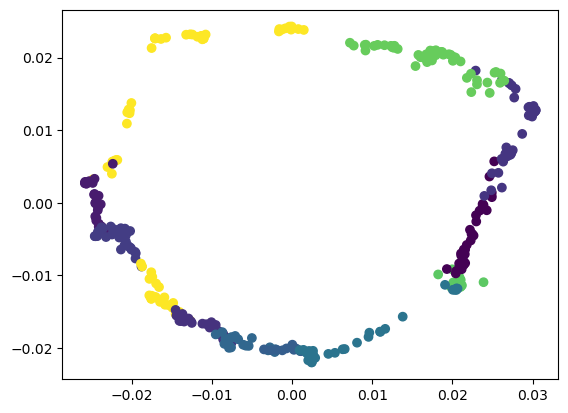

In [113]:
plt.scatter(Xpt[0][0*365:1*365], Xpt[1][0*365:1*365], c=nearestP[0*365:1*365])

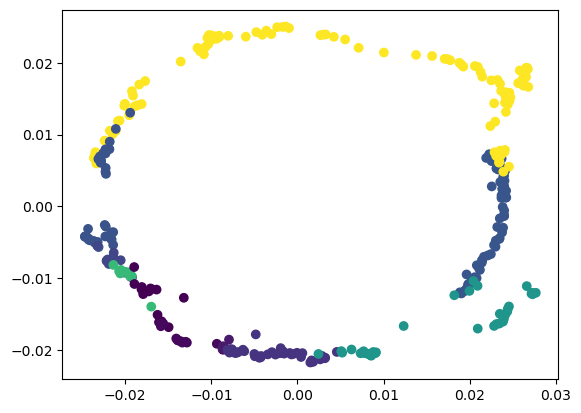

In [114]:
plt.scatter(Xpt[0][1*365:2*365], Xpt[1][1*365:2*365], c=nearestP[1*365:2*365])

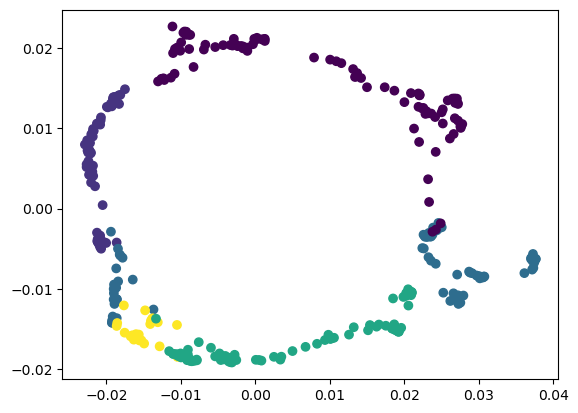

In [115]:
plt.scatter(Xpt[0][2*365:3*365], Xpt[1][2*365:3*365], c=nearestP[2*365:3*365])

In [119]:
def plotYr(yr,col):
    num=365
    plt.scatter(Xpt[0][yr*num:(yr+1)*num], Xpt[1][yr*num:(yr+1)*num], c=col[yr*num:(yr+1)*num])

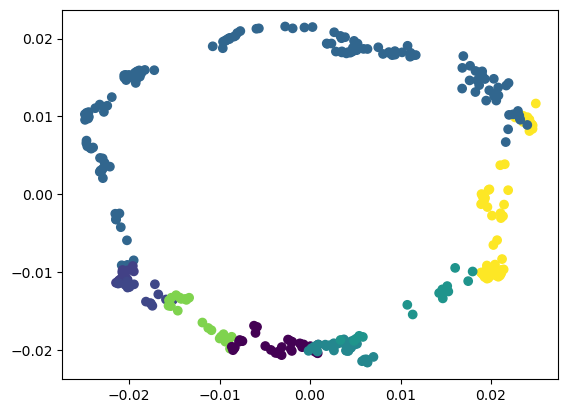

In [121]:
plotYr(3,nearestP)

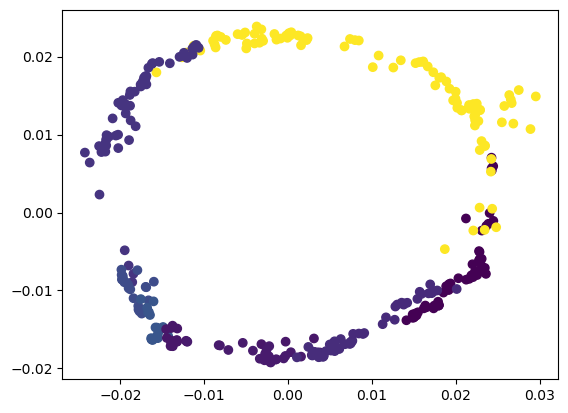

In [122]:
plotYr(4,nearestP)

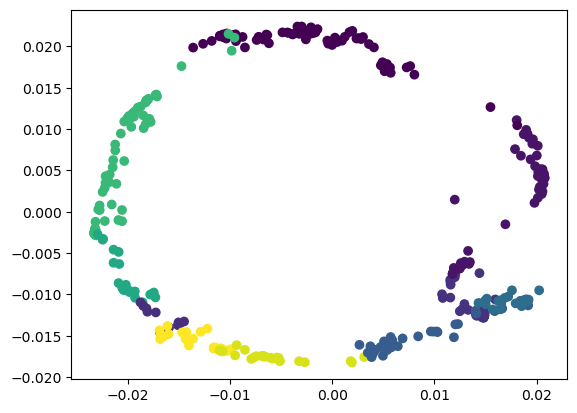

In [123]:
plotYr(5,nearestP)

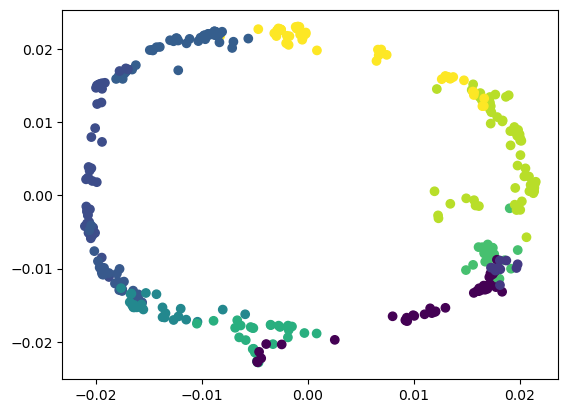

In [124]:
plotYr(6,nearestP)